In [37]:
import sys
sys.path.append("..")
import os
from utils.load_data import load_parquet, load_index, load_csv
from utils.evaultation.generator import Generator
from algo.LSHAlgo import LSH
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ndcg_score, dcg_score
import math

In [38]:
from utils.evaultation.score.metrics import get_mean_reciprocal_rank, get_mean_precision_k, get_mean_ndcg_k, get_mean_latency, get_median_latency, get_batch_latency
from utils.get_data_path import get_lsh_path, get_data_path


In [39]:
nbits_config = [2,4,8,16,32,64,128,256,512,768]

In [40]:
### Ground truth file path
gt_path = get_data_path("eval/gt/airline_reviews_AlgoType.VSM__type=gt.parquet")
gt_path

'c:\\Users\\user\\OneDrive\\Documents\\GitHub\\sc4020-project-1\\sc4020-project-1\\data\\eval\\gt\\airline_reviews_AlgoType.VSM__type=gt.parquet'

In [41]:
ground_truth_path = os.path.abspath('../data/eval/gt/airline_reviews_AlgoType.VSM__type=gt.parquet')
ground_truth = load_parquet(ground_truth_path)
print(f"Number of queries: {ground_truth.shape[0]}")
print(f"Top K: {len(ground_truth['top_k'][0].tolist())}")
ground_truth.head()

Number of queries: 32
Top K: 31


,question,embedded_question,top_k,time_taken
0,Philadelphia to London Heathrow with British A...,"[0.025521435, -0.04346351, -0.00019803375, 0.0...",[Philadelphia to London Heathrow with British ...,17
1,I have always travelled BA and have recently b...,"[0.05364885, -0.0017367848, 0.015748916, 0.045...",[I have always travelled BA and have recently ...,10
2,I'm not one for publishing reviews but followi...,"[0.032797378, -0.013920158, -0.000570529, 0.03...",[I'm not one for publishing reviews but follow...,13
3,I had the most fantastic BA Flight today. The ...,"[0.045647107, -0.0034340688, -0.010583293, 0.0...",[I had the most fantastic BA Flight today. The...,11
4,Paris to London. Flight cancelled due to “ATC ...,"[0.034370556, -0.04107361, -0.0078267045, 0.03...",[Paris to London. Flight cancelled due to “ATC...,10


In [42]:
### Parent file var
parent_file = "airlines_lsh_indiv_all_combi"

In [43]:
### Creating all combinations of construct and m

df_mp = pd.DataFrame({
    'nbits_config': [],
    "mp_1": [],
    "mp_3": [],
    "mp_5": [],
    "mp_10": [],
    "mrr_1": [],
    "mrr_3": [],
    "mrr_5": [],
    "mrr_10": [],
    "ndcg_1": [],
    "ndcg_3": [],
    "ndcg_5": [],
    "ndcg_10": [],
    "latency": []
})

for n in nbits_config:
    path = get_lsh_path("airline_reviews", parent_file, n, algo_type="AlgoType.LSH") 
    df_mp.loc[len(df_mp)] = [
        n,
        get_mean_precision_k(gt_path, [path], 1, 10, review_header="ReviewBody")[0],
        get_mean_precision_k(gt_path, [path], 3, 10, review_header="ReviewBody")[0],
        get_mean_precision_k(gt_path, [path], 5, 10, review_header="ReviewBody")[0],
        get_mean_precision_k(gt_path, [path], 10, 10, review_header="ReviewBody")[0],
        get_mean_reciprocal_rank(gt_path, [path], 1, review_header="ReviewBody")[0],
        get_mean_reciprocal_rank(gt_path, [path], 3, review_header="ReviewBody")[0],
        get_mean_reciprocal_rank(gt_path, [path], 5, review_header="ReviewBody")[0],
        get_mean_reciprocal_rank(gt_path, [path], 10, review_header="ReviewBody")[0],
        get_mean_ndcg_k(gt_path, [path], 1, review_header="ReviewBody")[0],
        get_mean_ndcg_k(gt_path, [path], 3, review_header="ReviewBody")[0],
        get_mean_ndcg_k(gt_path, [path], 5, review_header="ReviewBody")[0],
        get_mean_ndcg_k(gt_path, [path], 10, review_header="ReviewBody")[0],
        get_mean_latency([path])[0]
    ]

In [44]:
df_mp.head()

,nbits_config,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,2.0,0.00000,0.000000,0.0000,0.003125,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.002972,775659.375
1,4.0,0.00000,0.000000,0.0000,0.006250,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.003102,546978.125
2,8.0,0.03125,0.010417,0.0125,0.009375,0.00000,0.00000,0.00000,0.004464,0.00000,0.006563,0.009127,0.012222,611737.500
3,16.0,0.00000,0.000000,0.0125,0.012500,0.00000,0.00000,0.00000,0.005208,0.00000,0.000000,0.003931,0.009281,673412.500
4,32.0,0.06250,0.062500,0.0375,0.021875,0.03125,0.03125,0.03125,0.031250,0.03125,0.049375,0.042736,0.037318,365671.875


### Mean Precision@K

Mean Precision@3, Mean Precision@5, Mean Precision@10

In [45]:
df_mp[['nbits_config', 'mp_1', 'mp_3', 'mp_5', 'mp_10']].head(10)


,nbits_config,mp_1,mp_3,mp_5,mp_10
0,2.0,0.00000,0.000000,0.00000,0.003125
1,4.0,0.00000,0.000000,0.00000,0.006250
2,8.0,0.03125,0.010417,0.01250,0.009375
3,16.0,0.00000,0.000000,0.01250,0.012500
4,32.0,0.06250,0.062500,0.03750,0.021875
5,64.0,0.03125,0.052083,0.04375,0.031250
6,128.0,0.12500,0.104167,0.10000,0.093750
7,256.0,0.46875,0.333333,0.28750,0.221875
8,512.0,0.75000,0.468750,0.42500,0.312500
9,768.0,0.71875,0.562500,0.53125,0.415625


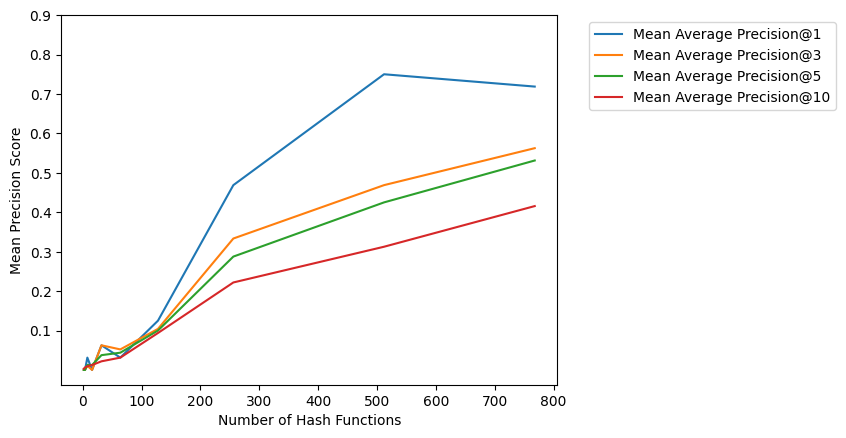

In [46]:
plt.plot(df_mp['nbits_config'], df_mp['mp_1'], label="Mean Average Precision@1")
plt.plot(df_mp['nbits_config'], df_mp['mp_3'], label="Mean Average Precision@3")
plt.plot(df_mp['nbits_config'], df_mp['mp_5'], label="Mean Average Precision@5")
plt.plot(df_mp['nbits_config'], df_mp['mp_10'], label="Mean Average Precision@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Precision Score")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

### Mean Reciprocal Rank@K

In [47]:
df_mp[['nbits_config', 'mrr_1', 'mrr_3', 'mrr_5', 'mrr_10']].head(10)


,nbits_config,mrr_1,mrr_3,mrr_5,mrr_10
0,2.0,0.00000,0.000000,0.000000,0.000000
1,4.0,0.00000,0.000000,0.000000,0.000000
2,8.0,0.00000,0.000000,0.000000,0.004464
3,16.0,0.00000,0.000000,0.000000,0.005208
4,32.0,0.03125,0.031250,0.031250,0.031250
5,64.0,0.00000,0.000000,0.000000,0.000000
6,128.0,0.06250,0.072917,0.093229,0.096354
7,256.0,0.15625,0.223958,0.236458,0.255246
8,512.0,0.15625,0.260417,0.297917,0.303125
9,768.0,0.31250,0.427083,0.453646,0.461582


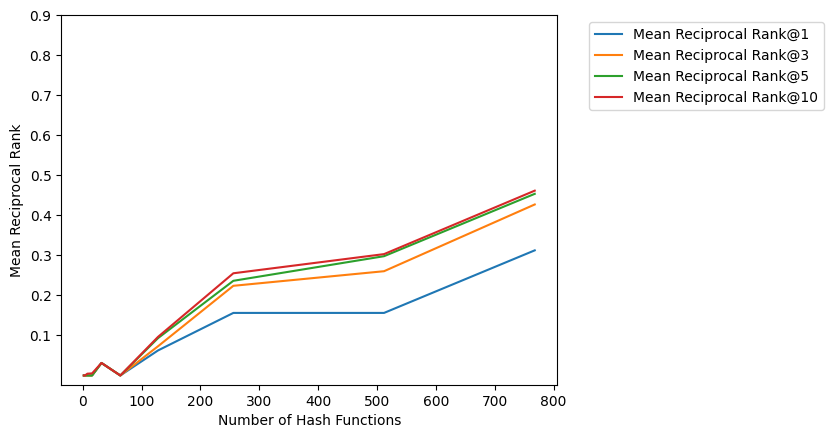

In [48]:
plt.plot(df_mp['nbits_config'], df_mp['mrr_1'], label="Mean Reciprocal Rank@1")
plt.plot(df_mp['nbits_config'], df_mp['mrr_3'], label="Mean Reciprocal Rank@3")
plt.plot(df_mp['nbits_config'], df_mp['mrr_5'], label="Mean Reciprocal Rank@5")
plt.plot(df_mp['nbits_config'], df_mp['mrr_10'], label="Mean Reciprocal Rank@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Reciprocal Rank")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

### Mean Normalised Discounted Cumulative Gain@K

In [49]:
df_mp[['nbits_config', 'ndcg_1', 'ndcg_3', 'ndcg_5', 'ndcg_10']].head(10)


,nbits_config,ndcg_1,ndcg_3,ndcg_5,ndcg_10
0,2.0,0.00000,0.000000,0.000000,0.002972
1,4.0,0.00000,0.000000,0.000000,0.003102
2,8.0,0.00000,0.006563,0.009127,0.012222
3,16.0,0.00000,0.000000,0.003931,0.009281
4,32.0,0.03125,0.049375,0.042736,0.037318
5,64.0,0.00000,0.016406,0.025279,0.030603
6,128.0,0.06250,0.049219,0.070716,0.098540
7,256.0,0.15625,0.185078,0.221647,0.275099
8,512.0,0.15625,0.301093,0.340327,0.379948
9,768.0,0.31250,0.446485,0.473200,0.517557


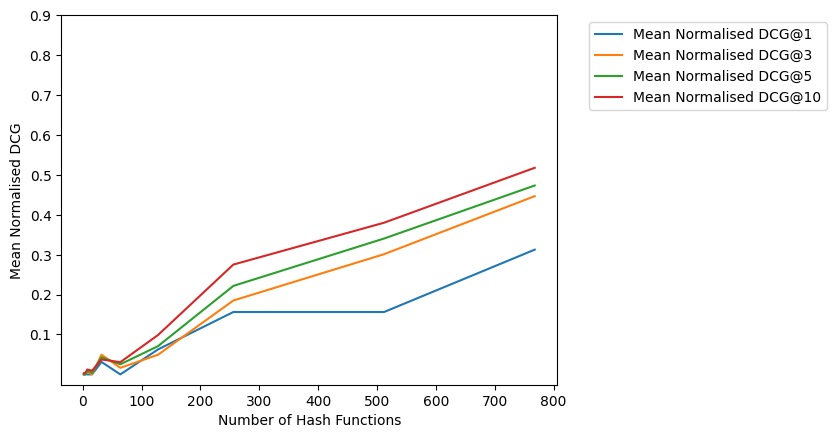

In [50]:
plt.plot(df_mp['nbits_config'], df_mp['ndcg_1'], label="Mean Normalised DCG@1")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_3'], label="Mean Normalised DCG@3")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_5'], label="Mean Normalised DCG@5")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_10'], label="Mean Normalised DCG@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Normalised DCG")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

## Latency

In [51]:
df_mp['latency'].max()

1066625.0

In [52]:
df_mp['latency'].min()

365671.875

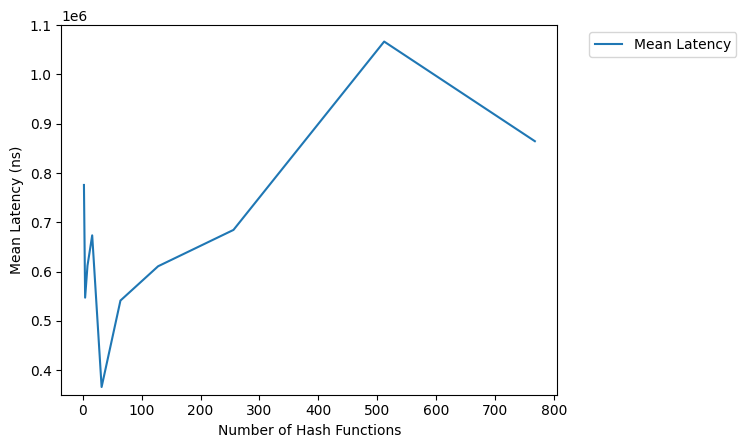

In [53]:
plt.plot(df_mp['nbits_config'], df_mp['latency'], label="Mean Latency")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Latency (ns)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(350000,1100000)
plt.show()

In [54]:
df_mp['latency'] = df_mp['latency'].apply(lambda x: round(x / 1_000_000, 3))
df_mp

,nbits_config,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,2.0,0.00000,0.000000,0.00000,0.003125,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002972,0.776
1,4.0,0.00000,0.000000,0.00000,0.006250,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.003102,0.547
2,8.0,0.03125,0.010417,0.01250,0.009375,0.00000,0.000000,0.000000,0.004464,0.00000,0.006563,0.009127,0.012222,0.612
3,16.0,0.00000,0.000000,0.01250,0.012500,0.00000,0.000000,0.000000,0.005208,0.00000,0.000000,0.003931,0.009281,0.673
4,32.0,0.06250,0.062500,0.03750,0.021875,0.03125,0.031250,0.031250,0.031250,0.03125,0.049375,0.042736,0.037318,0.366
5,64.0,0.03125,0.052083,0.04375,0.031250,0.00000,0.000000,0.000000,0.000000,0.00000,0.016406,0.025279,0.030603,0.541
6,128.0,0.12500,0.104167,0.10000,0.093750,0.06250,0.072917,0.093229,0.096354,0.06250,0.049219,0.070716,0.098540,0.611
7,256.0,0.46875,0.333333,0.28750,0.221875,0.15625,0.223958,0.236458,0.255246,0.15625,0.185078,0.221647,0.275099,0.684
8,512.0,0.75000,0.468750,0.42500,0.312500,0.15625,0.260417,0.297917,0.303125,0.15625,0.301093,0.340327,0.379948,1.067
9,768.0,0.71875,0.562500,0.53125,0.415625,0.31250,0.427083,0.453646,0.461582,0.31250,0.446485,0.473200,0.517557,0.864


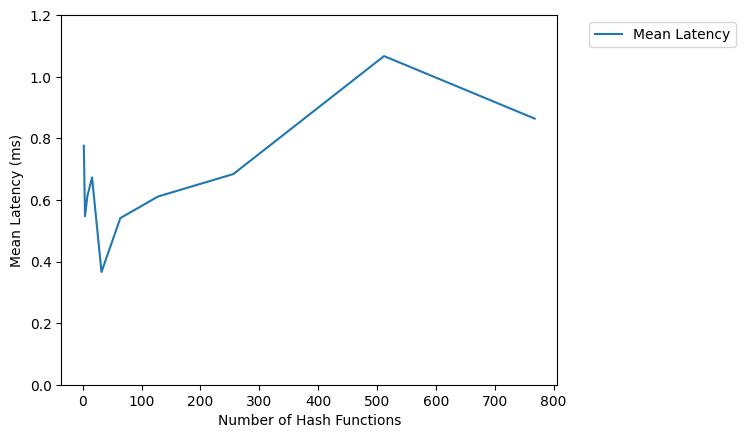

In [55]:
plt.plot(df_mp['nbits_config'], df_mp['latency'], label="Mean Latency")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Latency (ms)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0,1.2)
plt.show()

## Memory Usage

In [56]:
import os
base_file = "../data/airline_reviews/indexing/lsh"
sizes = []
for n in nbits_config:
    file = f"{base_file}{n}.index"
    print(f"{os.path.getsize(file)}")
    sizes.append(os.path.getsize(file)/1_000_000)

11986
20178
36562
73031
145969
291845
583597
1167101
2334109
3501117


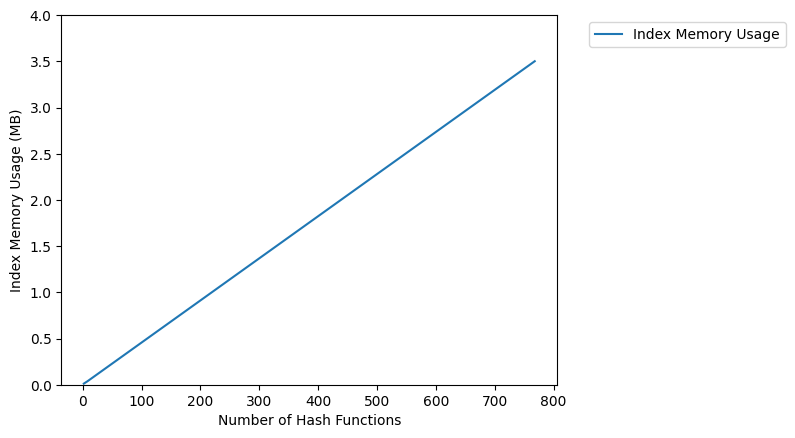

In [57]:
plt.plot(df_mp['nbits_config'], sizes, label="Index Memory Usage")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Index Memory Usage (MB)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 4)
plt.show()